In [2]:
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
import numpy as np
%matplotlib inline
import random
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [6]:
SP_df = pd.read_csv(r"StudentsPerformance.csv") # import dataset 

In [7]:
print(SP_df.head(10)) 
print(SP_df.dtypes) # descriptive summary
print(SP_df.describe()) # numerical summary

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   
5  female        group B          associate's degree      standard   
6  female        group B                some college      standard   
7    male        group B                some college  free/reduced   
8    male        group D                 high school  free/reduced   
9  female        group B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                  

  parental level of education  writing score  reading score  math score
0          associate's degree      69.896396      70.927928   67.882883
1           bachelor's degree      73.381356      73.000000   69.389831
2                 high school      62.448980      64.704082   62.137755
3             master's degree      75.677966      75.372881   69.745763
4                some college      68.840708      69.460177   67.128319
5            some high school      64.888268      66.938547   63.497207
          lunch  writing score  reading score  math score
0  free/reduced      63.022535      64.653521   58.921127
1      standard      70.823256      71.654264   70.034109
   gender  writing score  reading score  math score
0  female      72.467181      72.608108   63.633205
1    male      63.311203      65.473029   68.728216
  test preparation course  writing score  reading score  math score
0               completed      74.418994      73.893855   69.695531
1                    none     

<Axes: >

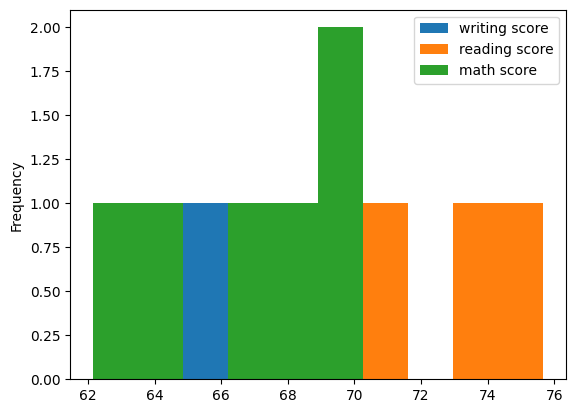

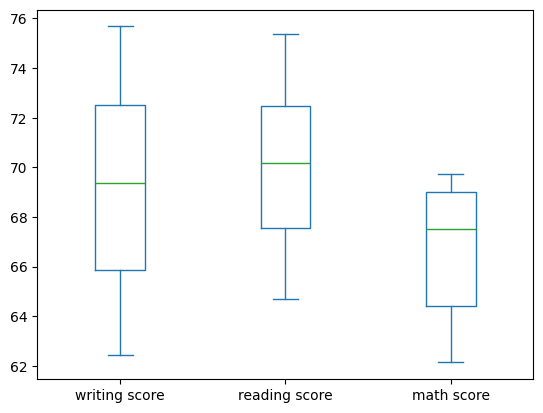

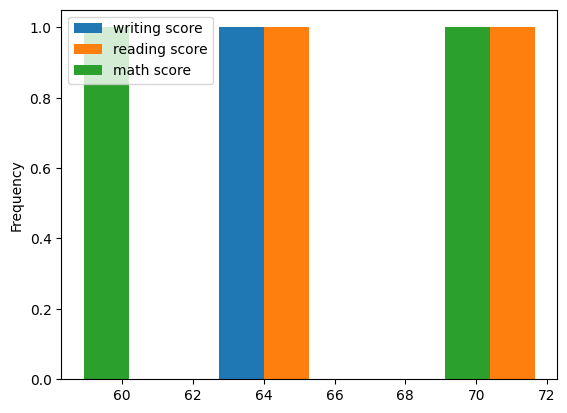

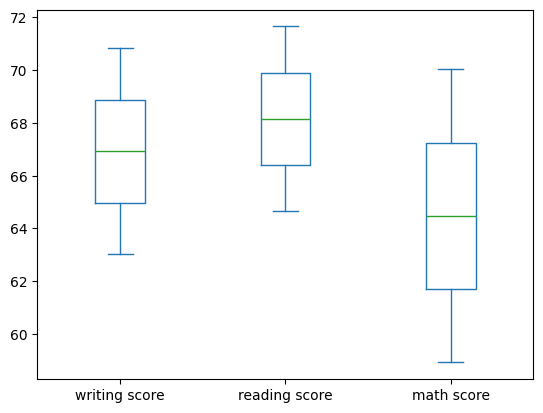

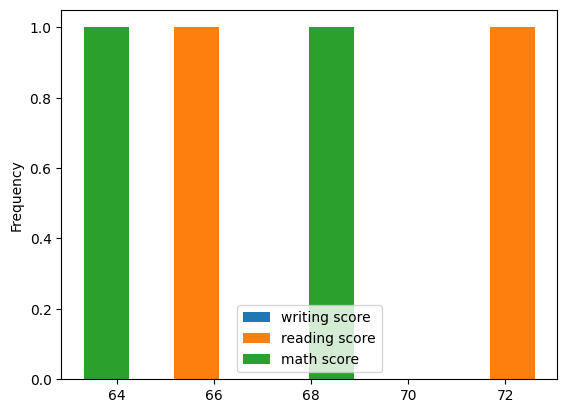

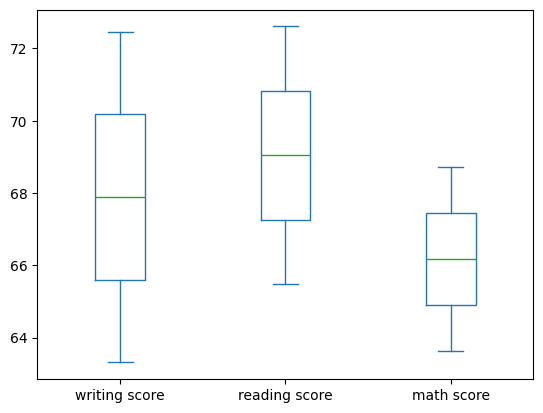

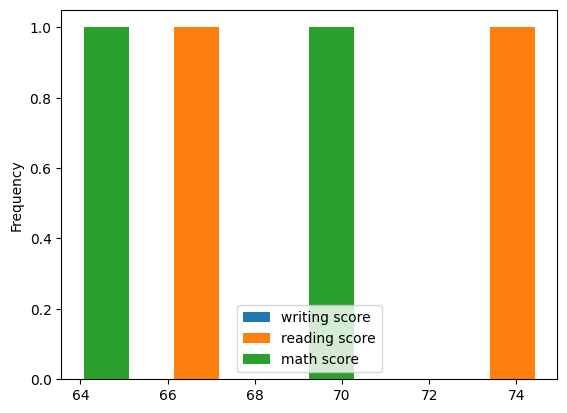

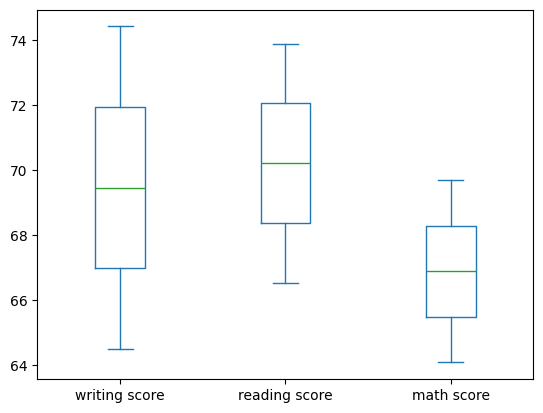

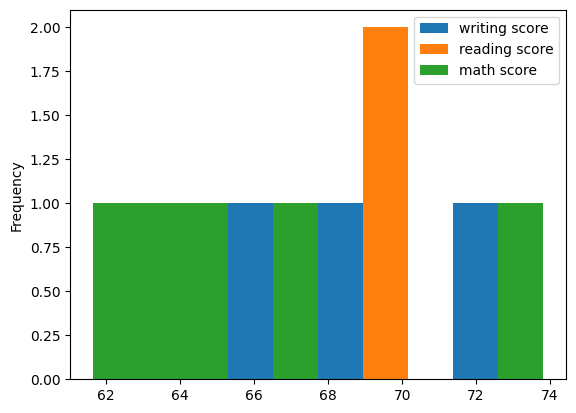

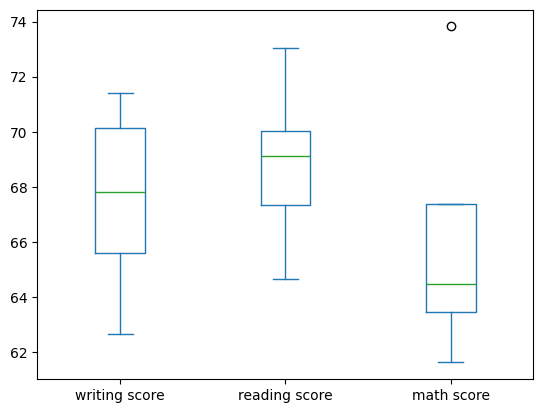

In [10]:
# graphical summaries of the distribution of scores for each group outlined in the research framework 
# analysis is included in Final Project PDF report

# Parental Level of Education
SP_df['parental level of education'].value_counts() 
SP_test1 = SP_df[['writing score', 'reading score','math score', 'parental level of education']]
SP_grp1 = SP_test1.groupby(['parental level of education'], as_index=False).mean()
print(SP_grp1)
SP_grp1.plot(kind='hist')
SP_grp1.plot(kind='box')

# Lunch
SP_df['lunch'].value_counts() 
SP_test2 = SP_df[['writing score', 'reading score','math score', 'lunch']]
SP_grp2 = SP_test2.groupby(['lunch'], as_index=False).mean()
print(SP_grp2)
SP_grp2.plot(kind='hist')
SP_grp2.plot(kind='box')

# Gender 
SP_df['gender'].value_counts() 
SP_test3 = SP_df[['writing score', 'reading score','math score', 'gender']]
SP_grp3 = SP_test3.groupby(['gender'], as_index=False).mean()
print(SP_grp3)                                    
SP_grp3.plot(kind='hist')
SP_grp3.plot(kind='box')

# Test Preparation Course 
SP_df['test preparation course'].value_counts() 
SP_test4 = SP_df[['writing score', 'reading score','math score', 'test preparation course']]
SP_grp4 = SP_test4.groupby(['test preparation course'], as_index=False).mean()
print(SP_grp4)
SP_grp4.plot(kind='hist')
SP_grp4.plot(kind='box')

# Race/Ethnicity 
SP_df['race/ethnicity'].value_counts() 
SP_test5 = SP_df[['writing score', 'reading score','math score', 'race/ethnicity']]
SP_grp5= SP_test5.groupby(['race/ethnicity'], as_index=False).mean()
print(SP_grp5)
SP_grp5.plot(kind='hist')
SP_grp5.plot(kind='box')
# correlation is visible through comparison of histograms 


In [11]:
# Data Science Algorithms 

# Simple and Multiple Regression 

#parental level of education and math score 

lm = LinearRegression()
z = pd.get_dummies(SP_df['parental level of education'])
lm.fit(z, SP_df['math score'])
Yhat = lm.predict(z)
Yhat
#parental level of education and writing score 
lm1 = LinearRegression()
z1 = pd.get_dummies(SP_df['parental level of education'])
lm1.fit(z, SP_df['writing score'])
Yhat = lm1.predict(z)
Yhat
# etc etc ; this process is continued for each variable for all 3 exams; I haven't included this in this files specefically because of how long the predictions 
# however, for my interpretations I will be referencing data from all the variables 


array([73.6875, 68.8125, 75.25  , 69.125 , 68.8125, 69.125 , 68.8125,
       68.8125, 63.25  , 63.25  , 69.125 , 69.125 , 63.25  , 68.8125,
       75.25  , 65.25  , 63.25  , 65.25  , 75.25  , 69.125 , 63.25  ,
       68.8125, 68.8125, 65.25  , 73.6875, 75.25  , 68.8125, 73.6875,
       63.25  , 75.25  , 68.8125, 68.8125, 75.25  , 68.8125, 68.8125,
       69.125 , 69.125 , 65.25  , 69.125 , 69.125 , 69.125 , 69.125 ,
       69.125 , 68.8125, 69.125 , 69.125 , 69.125 , 63.25  , 69.125 ,
       63.25  , 68.8125, 69.125 , 68.8125, 63.25  , 65.25  , 63.25  ,
       69.125 , 69.125 , 68.8125, 65.25  , 73.6875, 65.25  , 69.125 ,
       69.125 , 65.25  , 65.25  , 65.25  , 68.8125, 69.125 , 69.125 ,
       68.8125, 68.8125, 69.125 , 65.25  , 65.25  , 69.125 , 65.25  ,
       73.6875, 65.25  , 75.25  , 69.125 , 63.25  , 68.8125, 69.125 ,
       63.25  , 68.8125, 68.8125, 69.125 , 68.8125, 65.25  , 73.6875,
       63.25  , 63.25  , 69.125 , 68.8125, 69.125 , 65.25  , 68.8125,
       68.8125, 73.6

In [12]:
# Classification Algorithms 

# KNN 
# Here I use parental level of education in order to predict a students score on the math section of the exam 
# I repeated this process for the other variables and all 3 parts of the exam however I did not include this in the final part of my code 
# because of how long the output is, I will still be refrencing the results in my presentation and report 
n=pd.get_dummies(SP_df['parental level of education'])
j= SP_df['math score']
n =preprocessing.StandardScaler().fit(n).transform(n.astype(float)) # standardize data
n_train, n_test, j_train, j_test = train_test_split(n, j, test_size=0.2, random_state=1)
print ('Train set:', n_train.shape,  j_train.shape)
print ('Test set:', n_test.shape,  j_test.shape) # train/test split in order to improve accuracy 
k = 63
#Train Model and Predict Values
neigh = KNeighborsClassifier(n_neighbors = k).fit(n_train,j_train)
neigh
yhat = neigh.predict(n_test) 
print(yhat[0:15])
print("Train set Accuracy: ", metrics.accuracy_score(j_train, neigh.predict(n_train))) # compute test and training set accuracy 
print("Test set Accuracy: ", metrics.accuracy_score(j_test, yhat))
# k = 63 produced the highest test set accuracy (0.02)

Train set: (800, 6) (800,)
Test set: (200, 6) (200,)
[61 58 65 65 58 65 65 65 61 58 62 62 65 58 65]
Train set Accuracy:  0.05125
Test set Accuracy:  0.02


TypeError: agg function failed [how->mean,dtype->object]

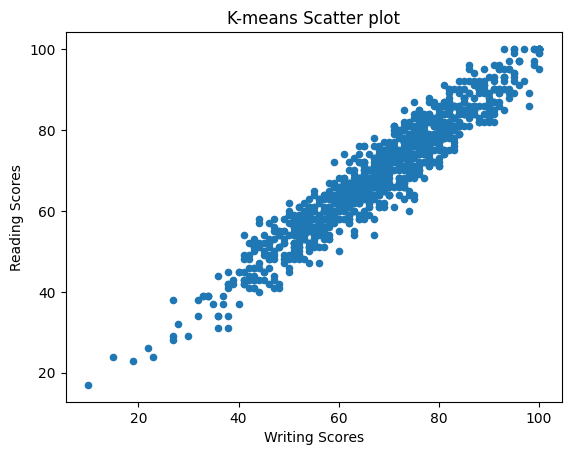

In [16]:
# Clustering Algorithms 
# I will be implementing the K-means clustering algorithim in order to find out the relationship between reading and writing scores 

SP_df.plot(kind='scatter', x = 'writing score', y='reading score') # create a scatter plot in order to find the number of clusters 
plt.title('K-means Scatter plot')
plt.xlabel('Writing Scores')
plt.ylabel('Reading Scores')

# there are 3 super defined clusters in the dataset 

x = SP_df[['writing score']]
y = SP_df[['reading score']]

k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 20) # default K-means
#model with 3 clusters because our data is mostly spread across evenly
k_means.fit(y) # fit the K-means model to our previous dataset containg the writing scores of students
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers
k_means_labels = k_means.labels_
SP_df["Clus_km"] = k_means_labels
SP_df.groupby('Clus_km').mean() # shows centroid values of clusters 